# Heart Disease Classification - Data Visualization - DNN

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing

In [2]:
# Load dataframe (df)
df = pd.read_csv('heart.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(303, 13) (303,)


In [3]:
df

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[303 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Describe dataframe
df.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [7]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3. Visualize Data

#### Age Distribution

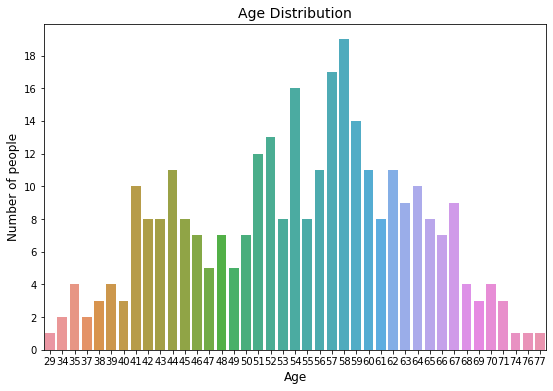

In [9]:
plt.figure(figsize=(9, 6))
plt.yticks(np.arange(0, 20, 2))
age_dist = df['age']
sns.countplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

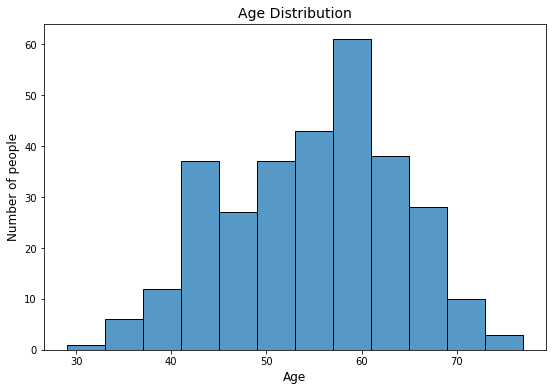

In [10]:
plt.figure(figsize=(9, 6))
age_dist = df['age']
sns.histplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

#### Gender Distribution

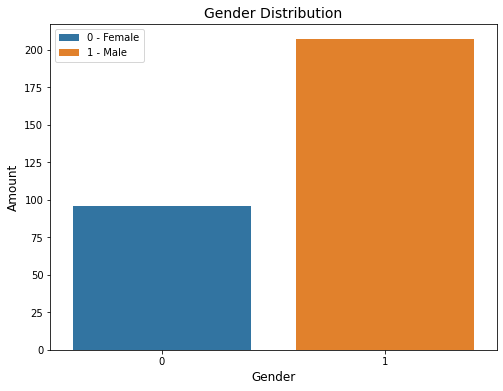

In [11]:
plt.figure(figsize=(8, 6))
gender_labels = ['0 - Female', '1 - Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
plt.yticks(np.arange(0, 225, 25))
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=gender_labels, loc='upper left')
plt.show()

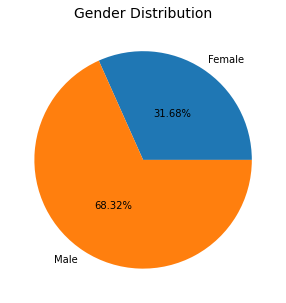

In [12]:
from collections import Counter

gender_labels_2 = ['Female', 'Male']
plt.figure(figsize=(5, 5))
overall_results = Counter(df['sex'])
plt.pie(x=[overall_results[0], overall_results[1]], 
        labels=gender_labels_2, autopct="%.2f%%", pctdistance=0.5)
plt.title('Gender Distribution', fontsize=14)
plt.show()

#### Chest Pain Type and Cholesterol Level

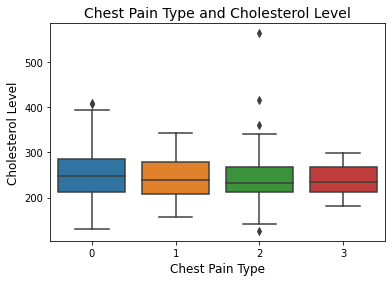

In [13]:
x = df['cp']
y = df['chol']
cp_labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
plt.yticks(np.arange(0, 700, 100))
box_plot = sns.boxplot(x=x, y=y, data=df)
box_plot.set_xlabel('Chest Pain Type', fontsize=12)
box_plot.set_ylabel('Cholesterol Level', fontsize=12)
box_plot.set_title('Chest Pain Type and Cholesterol Level', fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 = Nontypical, 1 = Nonanginal, 2 = Asymptomatic, 3 = Typical

#### Chest Pain and Heart Rate

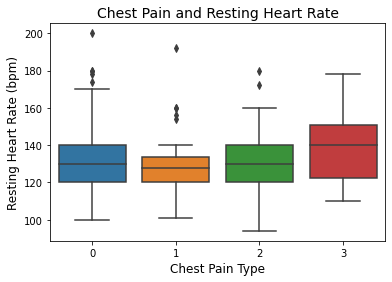

In [14]:
x = df['cp']
y = df['trestbps']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
sns.boxplot(x=x, y=y, data=df)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=12)
plt.title('Chest Pain and Resting Heart Rate', fontsize=14)
plt.show()

#### Age vs. Cholesterol Level

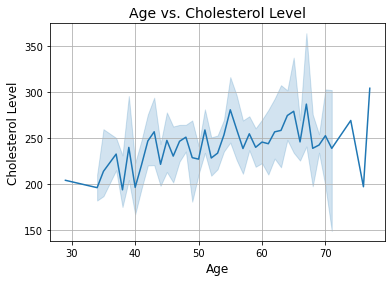

In [15]:
x = df['age']
y = df['chol']
line_plot = sns.lineplot(x=x, y=y, data=df)
line_plot.set_xlabel('Age', fontsize=12)
line_plot.set_ylabel('Cholesterol Level', fontsize=12)
line_plot.set_title('Age vs. Cholesterol Level', fontsize=14)
plt.grid()
plt.show()

#### Age vs. Blood Sugar

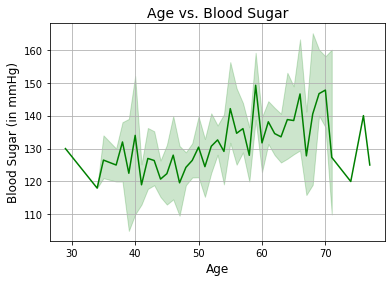

In [16]:
x = df['age']
y = df['trestbps']
line_plot = sns.lineplot(x=x, y=y, data=df, color='green')
line_plot.set_xlabel('Age', fontsize=12)
line_plot.set_ylabel('Blood Sugar (in mmHg)', fontsize=12)
line_plot.set_title('Age vs. Blood Sugar', fontsize=14)
plt.grid()
plt.show()

#### Classication Results

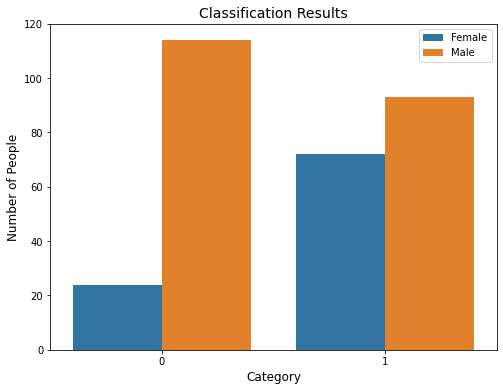

In [17]:
gender_labels_2 = ['Female', 'Male']
plt.figure(figsize=(8, 6))
target = df['target']
sns.countplot(x=target, hue=df['sex'])
plt.yticks(np.arange(0, 140, 20))
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Classification Results', fontsize=14)
plt.legend(labels=gender_labels_2)
plt.show()

###### **Category:**
0 = No Heart Disease, 1 = Heart Disease

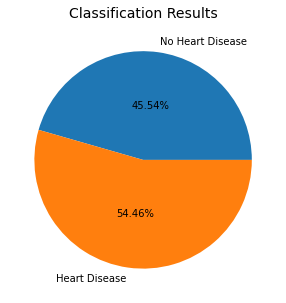

In [18]:
classification_labels = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(5, 5))
overall_results = Counter(df['target'])
plt.pie(x=[overall_results[0], overall_results[1]], 
        labels=classification_labels, autopct="%.2f%%", pctdistance=0.5)
plt.title('Classification Results', fontsize=14)
plt.show()

#### Pairwise Relationships Between Features

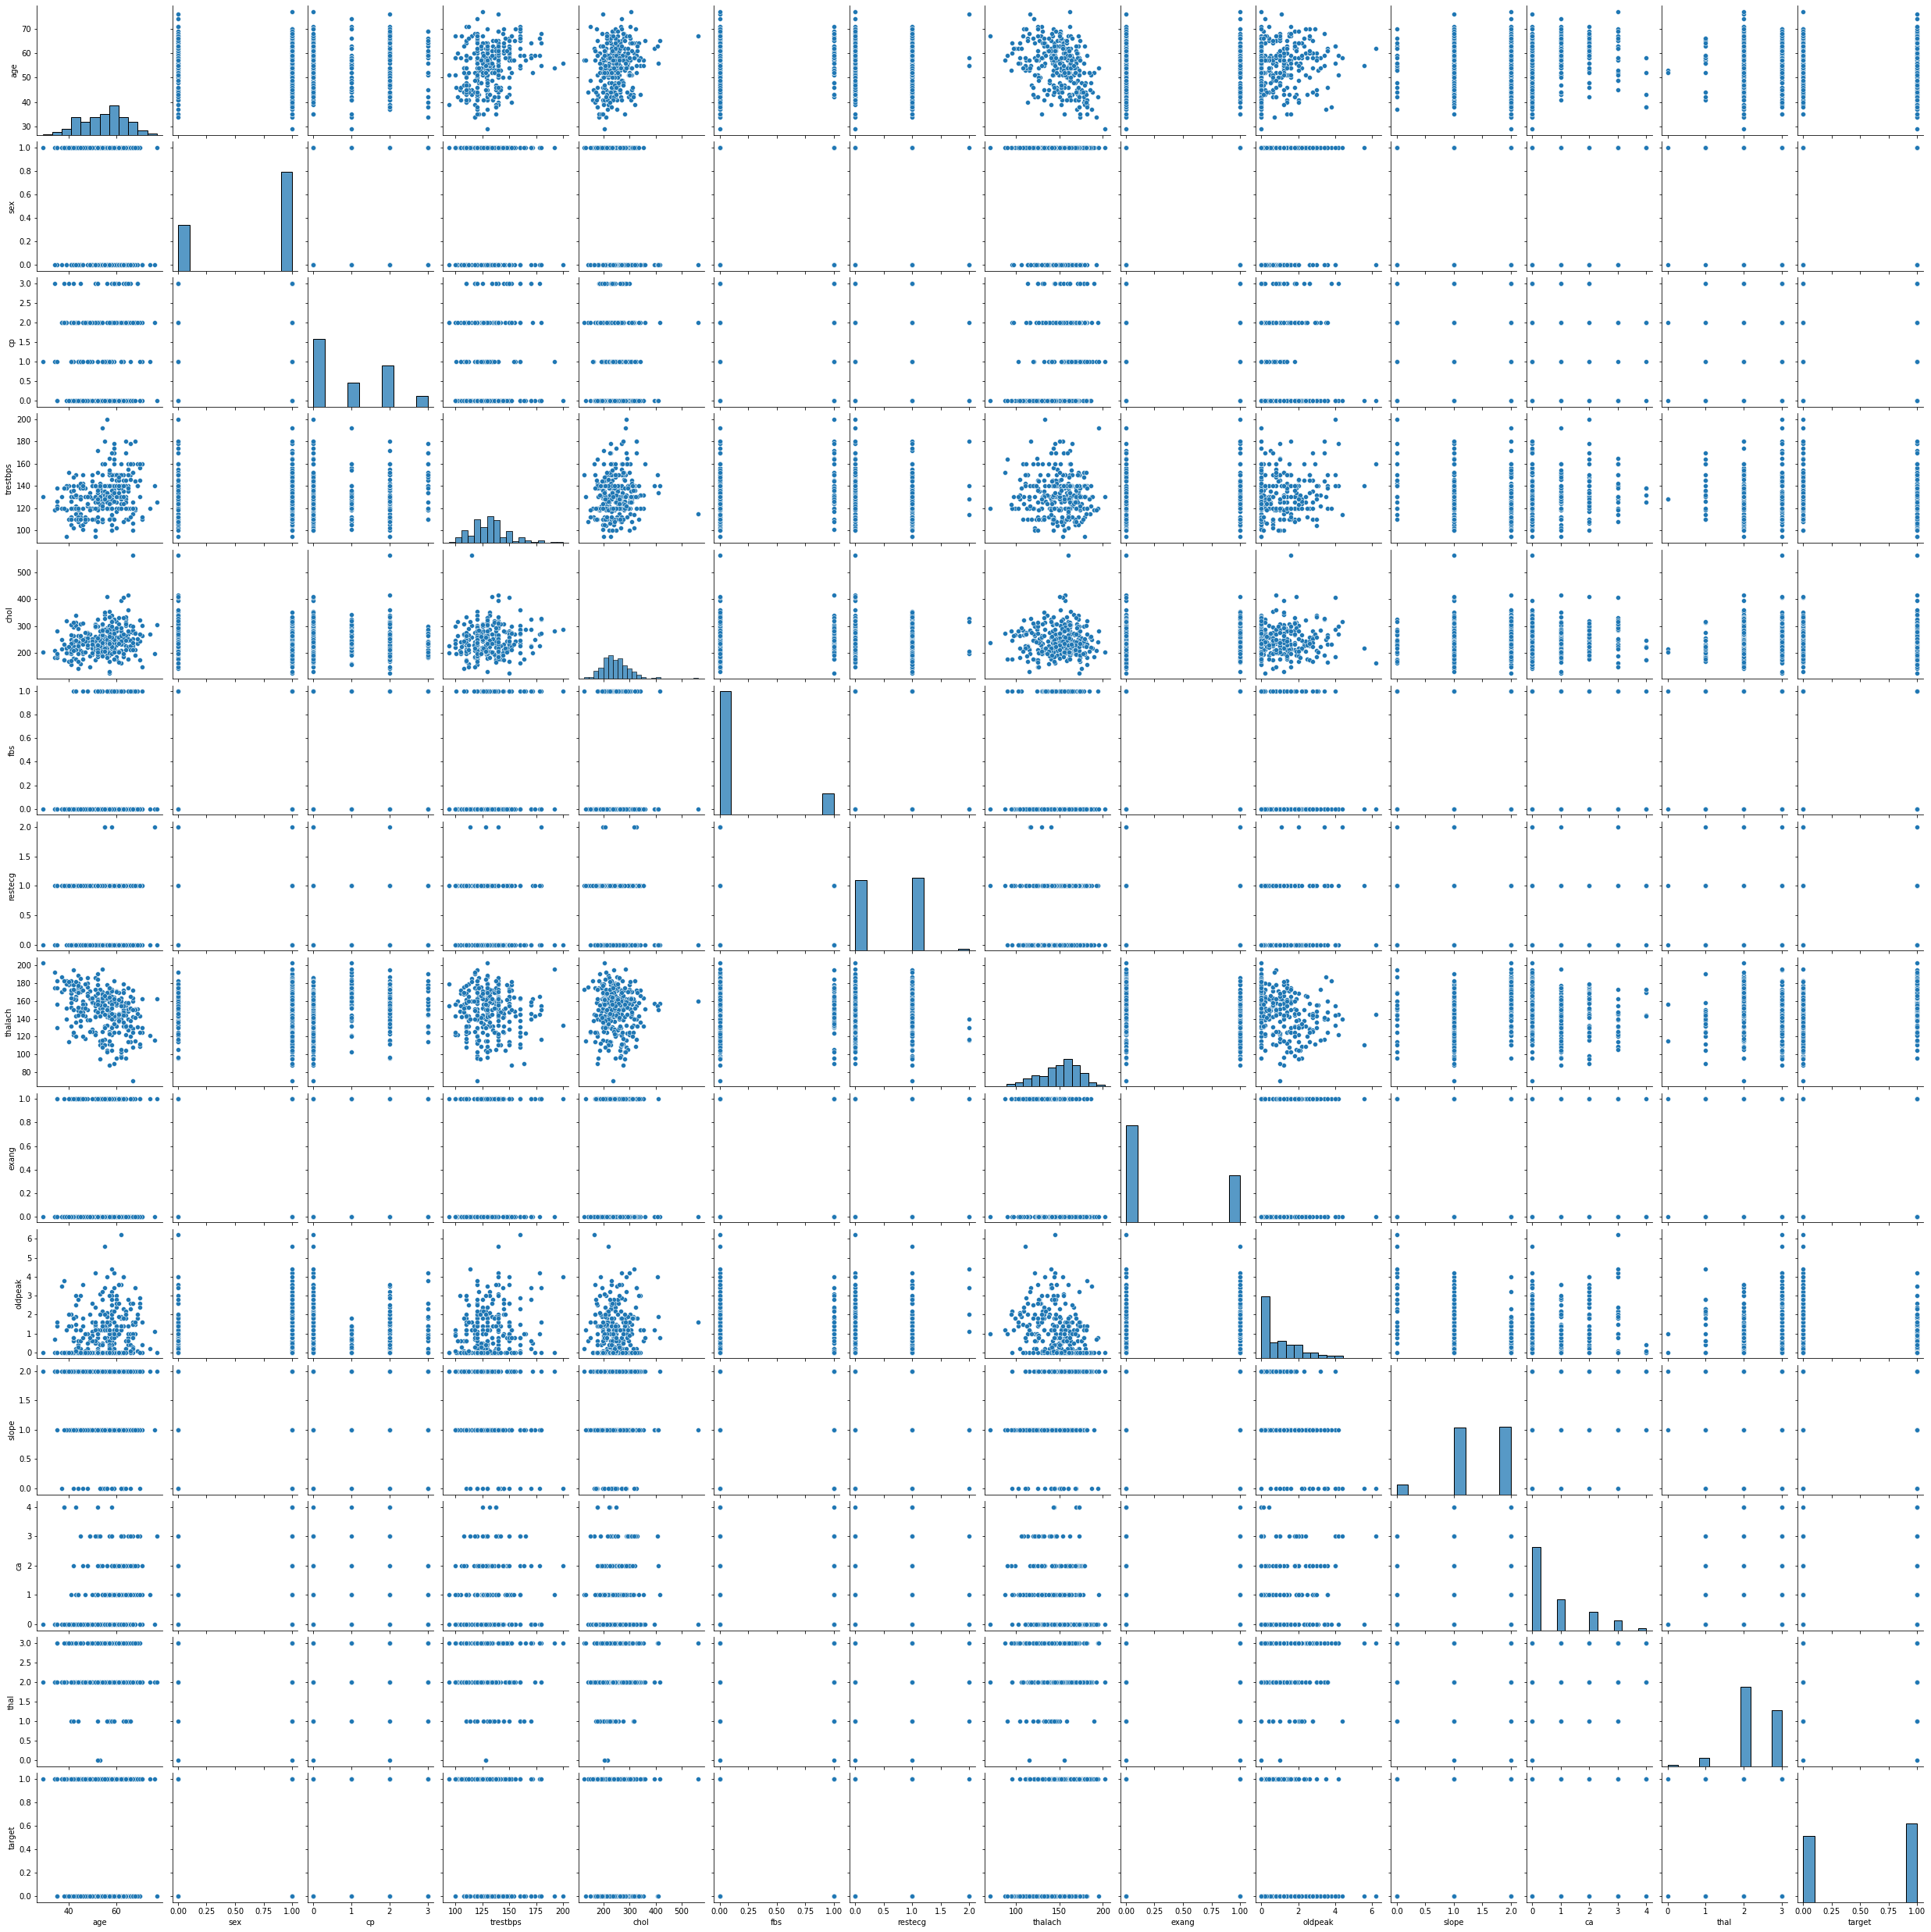

In [19]:
sns.pairplot(df)

#### Correlation Map

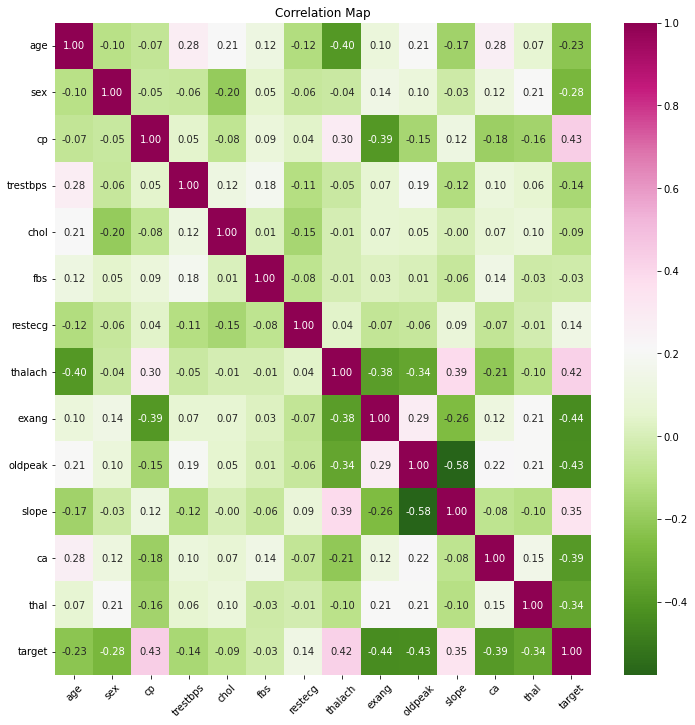

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='PiYG_r', annot=True, fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Define DNN Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import make_scorer

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

Batch size = 32, Epochs = 150, k-Folds = 3


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.6654 - accuracy: 0.5992 - val_loss: 0.6509 - val_accuracy: 0.7541
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.6612 - val_loss: 0.6389 - val_accuracy: 0.7541
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6435 - accuracy: 0.6364 - val_loss: 0.6268 - val_accuracy: 0.7705
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.6488 - val_loss: 0.6144 - val_accuracy: 0.7705
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6860 - val_loss: 0.6032 - val_accuracy: 0.8033
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.6860 - val_loss: 0.5913 - val_accuracy: 0.8361
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.7603 - val_loss: 0.5793 - val_accuracy: 0.8525
Epoch 8/150
8/8 [=========

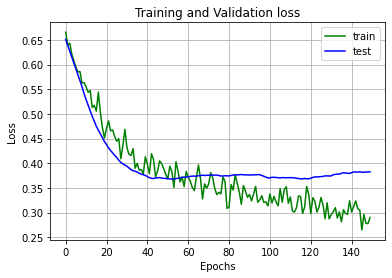

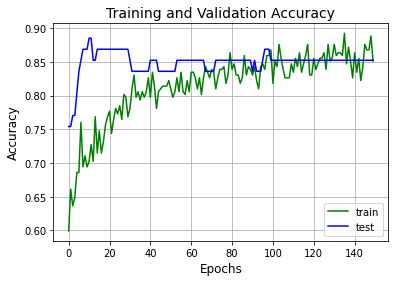

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.7121 - accuracy: 0.5620 - val_loss: 0.6799 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.5248 - val_loss: 0.6711 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.5909 - val_loss: 0.6636 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.5950 - val_loss: 0.6570 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.5496 - val_loss: 0.6511 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6405 - val_loss: 0.6447 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6464 - accuracy: 0.5909 - val_loss: 0.6393 - val_accuracy: 0.5902
Epoch 8/

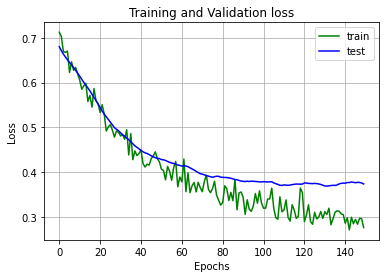

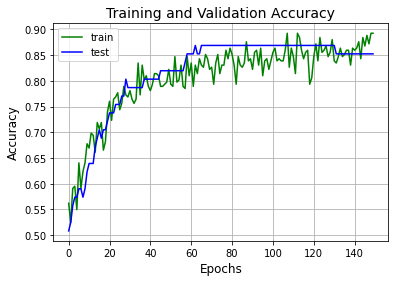

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.6756 - accuracy: 0.5744 - val_loss: 0.6242 - val_accuracy: 0.6721
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6584 - accuracy: 0.5331 - val_loss: 0.6129 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6448 - accuracy: 0.6074 - val_loss: 0.6044 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6349 - accuracy: 0.6281 - val_loss: 0.5954 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.6116 - val_loss: 0.5866 - val_accuracy: 0.7705
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6106 - accuracy: 0.6901 - val_loss: 0.5780 - val_accuracy: 0.7869
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6060 - accuracy: 0.7149 - val_loss: 0.5690 - val_accuracy: 0.7869
Epoch 8/

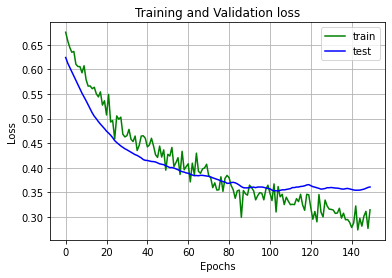

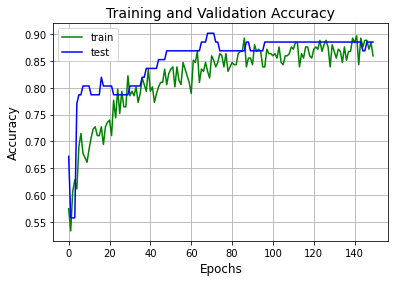

accuracy: 88.525%
Mean Accuracy: 86.339%
Standard Deviation: 1.546%
Losses:
[38.26206624507904, 37.41569519042969, 36.10473275184631]
Scores:
[85.24590134620667, 85.24590134620667, 88.52459192276001]


In [22]:
cv_scores = []  # Scores for each k-Fold
losses = []  # Losses for each k-Fold
def create_model(batch_size, epochs, folds, neurons, dropout_rate):  
  """ Define DL model with specified parameters """
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  print('Batch size = %d, Epochs = %d, k-Folds = %d' % (batch_size, epochs, folds))
  for train, test in kfold.split(X, y):
   
    # Define Deep Learning model
    model = Sequential()
    # Input layer and Hidden Layer 1
    model.add(Dense(units=neurons[0], input_dim=13, activation='relu'))
    # model.add(Dropout(rate=dropout_rate))
    # Hidden Layer 2
    model.add(Dense(units=neurons[1],activation='relu'))
    # Dropout layer
    model.add(Dropout(rate=dropout_rate))
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

    # Plot loss during training
    plt.plot(history.history['loss'], 'g', label='train')
    plt.plot(history.history['val_loss'], 'b', label='test')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot accuracy during training
    plt.plot(history.history['accuracy'], 'g', label='train')
    plt.plot(history.history['val_accuracy'], 'b', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    # Print scores
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('%s: %.3f%%' % (model.metrics_names[1], scores[1]*100))
    losses.append(scores[0] * 100)  # Loss percentage
    cv_scores.append(scores[1] * 100)  # Score percentage
  return model

# With one dropout layer (optimal results from Random Search)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 
# 'dropout_rate': 0.4}
model = create_model(32, 150, 3, (14, 6), 0.4)

# With two dropout layers (results in too much underfitting)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 
# 'dropout_rate': 0.45}
# model = create_model(32, 150, 3, (14, 8), 0.45)

# Print results
print('Mean Accuracy: %.3f%%' % np.mean(cv_scores))
print('Standard Deviation: %.3f%%' % np.std(cv_scores))
print('Losses:')
print(losses)
print('Scores:')
print(cv_scores)

#### -- Sample Results --

##### Using one dropout layer (optimal results from Random Search):
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 'dropout_rate': 0.4}

<table border = "1">
  <thead>
    <th colspan = "5">With one dropout layer</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>85.792</td>
      <td>1.546</td>
      <td>[40.784, 36.420, 37.566]</td>
      <td>[83.607, 86.885, 86.885]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.234, 38.973, 37.645]</td>
      <td>[88.525, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[39.444, 36.632, 39.889]</td>
      <td>[81.967, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>88.525</td>
      <td>1.339</td>
      <td>[38.665, 30.301, 35.466]</td>
      <td>[86.885, 90.164, 88.525]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.047, 35.591, 39.353]</td>
      <td>[88.525, 83.607, 86.885]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>86.230<b></td>
      <td><b>1.804</b></td>
    </tr>
  </tbody>
</table>

##### With two dropout layers (results in too much underfitting)
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 'dropout_rate': 0.45}

<table border = "1">
  <thead>
    <th colspan = "5">With two dropout layers</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[36.204, 33.903, 37.372]</td>
      <td>[86.885, 83.607, 88.525]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>84.699</td>
      <td>2.045</td>
      <td>[37.547, 36.046, 32.915]</td>
      <td>[81.967, 85.246, 86.885]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>83.607</td>
      <td>1.339</td>
      <td>[40.159, 36.067, 40.181]</td>
      <td>[83.607, 85.246, 81.967]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[36.800, 38.977, 37.290]</td>
      <td>[83.607, 86.885, 81.967]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>85.246</td>
      <td>2.677</td>
      <td>[35.594, 41.179, 37.873]</td>
      <td>[85.246, 81.967, 88.525]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>85.409</b></td>
      <td><b>2.030</b></td>
    </tr>
  </tbody>
</table>

##### NOTE: These results vary between trials.

## 5. Evaluate DNN Model

In [23]:
# Predict test set results
y_pred = model.predict(X_test)
# If y_pred > 0.5, patient has heart disease
y_pred = (y_pred > 0.5)

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Val. Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
print("Val. ROC AUC: %.3f%% " % (roc_auc_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[22  5]
 [ 2 32]]

Val. Accuracy: 88.525% 
Val. ROC AUC: 87.800% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 26ms/step - loss: 0.8420 - accuracy: 0.3636 - val_loss: 0.8123 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.8812 - accuracy: 0.3760 - val_loss: 0.7900 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 5ms/step - loss: 0.8143 - accuracy: 0.4008 - val_loss: 0.7720 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 0.8215 - accuracy: 0.3967 - val_loss: 0.7561 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.8088 - accuracy: 0.3967 - val_loss: 0.7424 - val_accuracy: 0.4262
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7540 - accuracy: 0.4463 - val_loss: 0.7314 - val_accuracy: 0.4262
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.7392 - accuracy: 0.4256 - val_loss: 0.7217 - val_accuracy: 0.5246
Epoch 8/150
8/8 [=====================

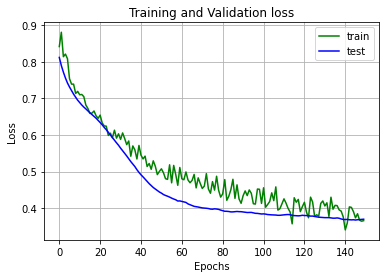

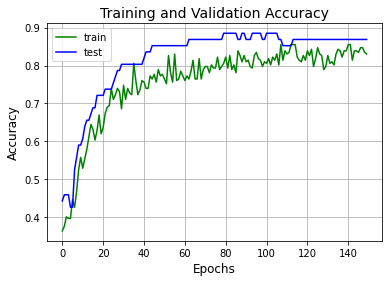

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.8767 - accuracy: 0.4587 - val_loss: 0.8363 - val_accuracy: 0.5574
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.8718 - accuracy: 0.4752 - val_loss: 0.7972 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7976 - accuracy: 0.5248 - val_loss: 0.7669 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.7590 - accuracy: 0.5207 - val_loss: 0.7393 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7793 - accuracy: 0.5372 - val_loss: 0.7156 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7467 - accuracy: 0.5579 - val_loss: 0.6929 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7210 - accuracy: 0.5744 - val_loss: 0.6744 - val_accuracy: 0.6066
Epoch 8/

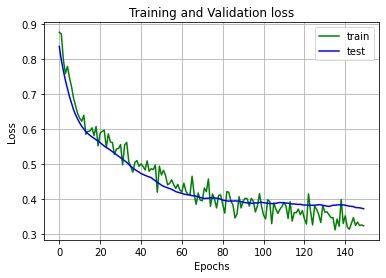

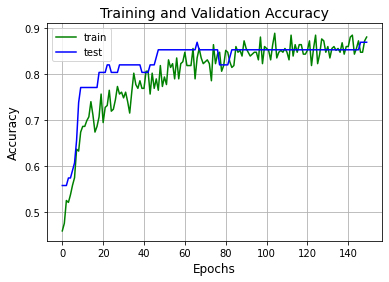

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.8119 - accuracy: 0.4545 - val_loss: 0.7411 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7911 - accuracy: 0.4504 - val_loss: 0.7140 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7676 - accuracy: 0.4793 - val_loss: 0.6895 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7138 - accuracy: 0.5248 - val_loss: 0.6701 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5950 - val_loss: 0.6544 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.6074 - val_loss: 0.6407 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.6116 - val_loss: 0.6283 - val_accuracy: 0.6721
Epoch 8/

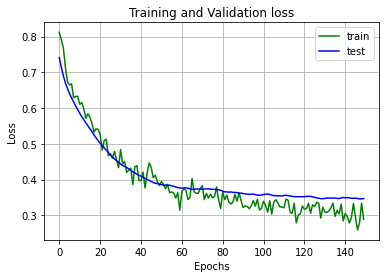

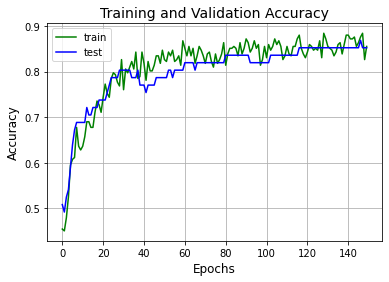

accuracy: 85.246%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 28ms/step - loss: 0.7638 - accuracy: 0.4793 - val_loss: 0.6900 - val_accuracy: 0.5410
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7487 - accuracy: 0.5083 - val_loss: 0.6807 - val_accuracy: 0.5410
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7318 - accuracy: 0.5537 - val_loss: 0.6734 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7024 - accuracy: 0.5744 - val_loss: 0.6658 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.5785 - val_loss: 0.6582 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.5331 - val_loss: 0.6522 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5372 - val_loss: 0.6459 - val_accuracy: 0.6393
Epoch 8/150
8/8 [=====================

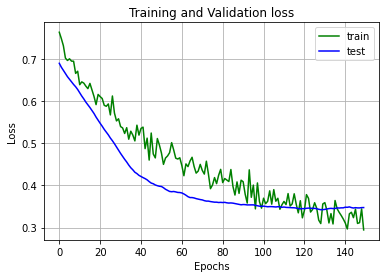

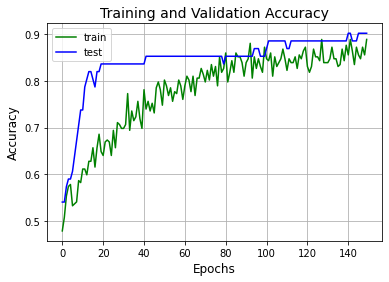

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.7112 - accuracy: 0.5165 - val_loss: 0.7199 - val_accuracy: 0.3934
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7198 - accuracy: 0.4752 - val_loss: 0.7123 - val_accuracy: 0.3934
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7096 - accuracy: 0.5041 - val_loss: 0.7058 - val_accuracy: 0.4098
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7053 - accuracy: 0.5289 - val_loss: 0.7000 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7005 - accuracy: 0.5248 - val_loss: 0.6929 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5826 - val_loss: 0.6852 - val_accuracy: 0.5574
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.5868 - val_loss: 0.6774 - val_accuracy: 0.5574
Epoch 8/

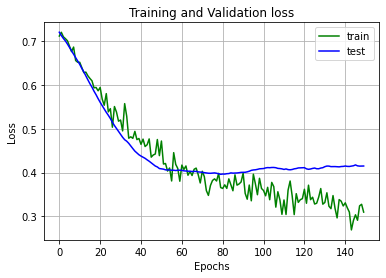

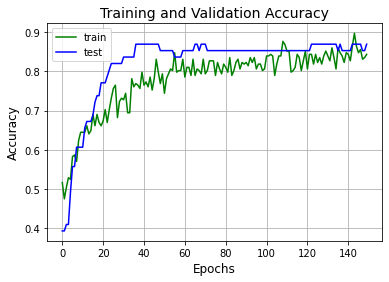

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 24ms/step - loss: 0.7199 - accuracy: 0.4959 - val_loss: 0.6827 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7156 - accuracy: 0.5331 - val_loss: 0.6699 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.5289 - val_loss: 0.6593 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.5785 - val_loss: 0.6488 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.5331 - val_loss: 0.6404 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6796 - accuracy: 0.5579 - val_loss: 0.6335 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6579 - accuracy: 0.6116 - val_loss: 0.6268 - val_accuracy: 0.7049
Epoch 8/

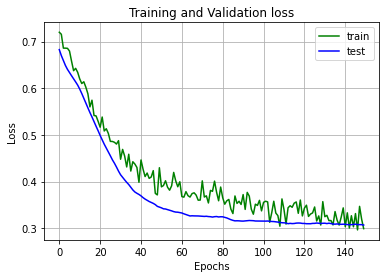

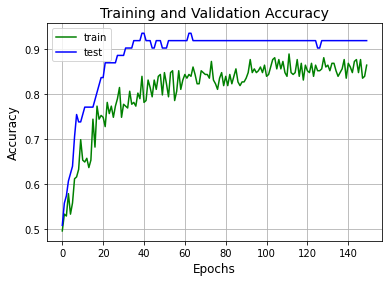

accuracy: 91.803%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 25ms/step - loss: 0.8871 - accuracy: 0.5331 - val_loss: 0.8749 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.9618 - accuracy: 0.4628 - val_loss: 0.8040 - val_accuracy: 0.4754
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 0.8394 - accuracy: 0.5289 - val_loss: 0.7455 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.8470 - accuracy: 0.4793 - val_loss: 0.7002 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.8192 - accuracy: 0.5372 - val_loss: 0.6597 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7162 - accuracy: 0.5661 - val_loss: 0.6301 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.7643 - accuracy: 0.5496 - val_loss: 0.6026 - val_accuracy: 0.5738
Epoch 8/150
8/8 [=====================

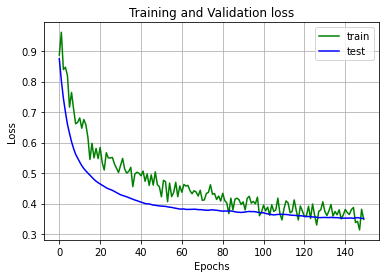

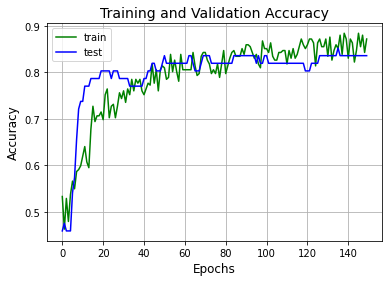

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 24ms/step - loss: 0.7472 - accuracy: 0.5083 - val_loss: 0.7108 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7453 - accuracy: 0.4711 - val_loss: 0.6938 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7113 - accuracy: 0.5537 - val_loss: 0.6785 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.6033 - val_loss: 0.6644 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.5620 - val_loss: 0.6517 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.6322 - val_loss: 0.6404 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6482 - accuracy: 0.6281 - val_loss: 0.6302 - val_accuracy: 0.6721
Epoch 8/

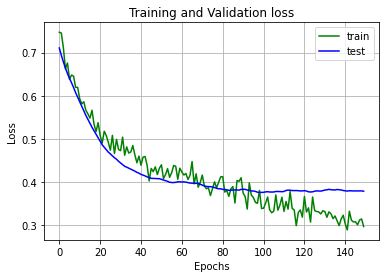

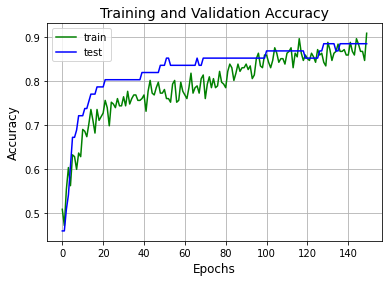

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 25ms/step - loss: 0.7556 - accuracy: 0.5000 - val_loss: 0.7568 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.7370 - accuracy: 0.5165 - val_loss: 0.7412 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7120 - accuracy: 0.4876 - val_loss: 0.7277 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.7035 - accuracy: 0.5289 - val_loss: 0.7172 - val_accuracy: 0.5246
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5413 - val_loss: 0.7099 - val_accuracy: 0.5574
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5289 - val_loss: 0.7040 - val_accuracy: 0.5574
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.5744 - val_loss: 0.6976 - val_accuracy: 0.5738
Epoch 8/

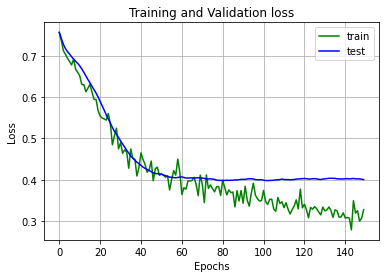

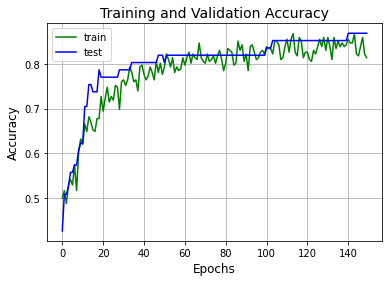

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 27ms/step - loss: 0.7165 - accuracy: 0.5000 - val_loss: 0.6517 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6074 - val_loss: 0.6426 - val_accuracy: 0.6230
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5579 - val_loss: 0.6348 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6665 - accuracy: 0.5868 - val_loss: 0.6275 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6745 - accuracy: 0.6074 - val_loss: 0.6201 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.6322 - val_loss: 0.6146 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6659 - accuracy: 0.5909 - val_loss: 0.6093 - val_accuracy: 0.6557
Epoch 8/150
8/8 [=====================

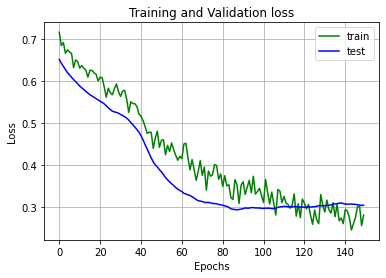

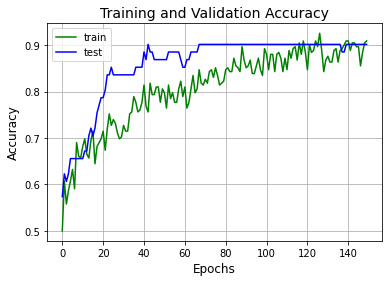

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 30ms/step - loss: 0.6801 - accuracy: 0.5579 - val_loss: 0.6378 - val_accuracy: 0.6885
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6770 - accuracy: 0.5537 - val_loss: 0.6215 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6754 - accuracy: 0.5744 - val_loss: 0.6073 - val_accuracy: 0.7377
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.5950 - val_loss: 0.5936 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6191 - accuracy: 0.6653 - val_loss: 0.5806 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6124 - accuracy: 0.6653 - val_loss: 0.5679 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.6901 - val_loss: 0.5568 - val_accuracy: 0.7213
Epoch 8/

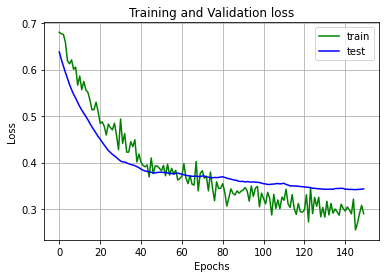

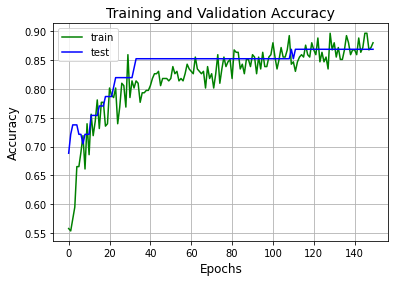

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.7451 - accuracy: 0.4504 - val_loss: 0.7014 - val_accuracy: 0.5574
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7396 - accuracy: 0.4339 - val_loss: 0.6842 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5207 - val_loss: 0.6702 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.5496 - val_loss: 0.6587 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.5950 - val_loss: 0.6479 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6469 - accuracy: 0.6529 - val_loss: 0.6367 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6538 - accuracy: 0.6612 - val_loss: 0.6261 - val_accuracy: 0.7213
Epoch 8

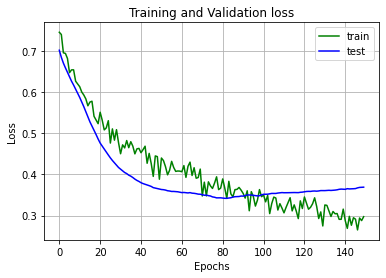

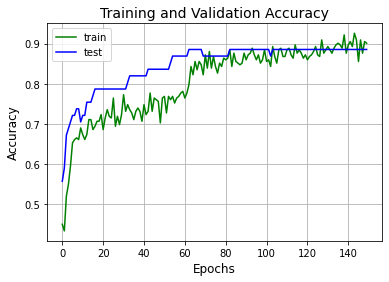

accuracy: 88.525%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 31ms/step - loss: 0.7267 - accuracy: 0.5124 - val_loss: 0.6957 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.5661 - val_loss: 0.6812 - val_accuracy: 0.5410
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6991 - accuracy: 0.5496 - val_loss: 0.6673 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5455 - val_loss: 0.6539 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6866 - accuracy: 0.5620 - val_loss: 0.6411 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6666 - accuracy: 0.5579 - val_loss: 0.6316 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6668 - accuracy: 0.5620 - val_loss: 0.6233 - val_accuracy: 0.6721
Epoch 8/150
8/8 [====================

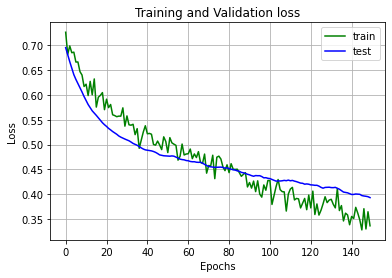

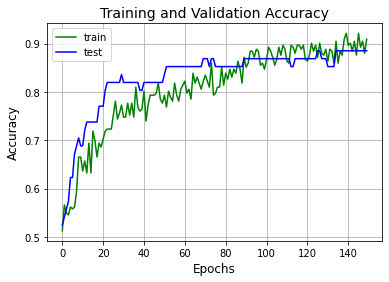

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 28ms/step - loss: 0.7665 - accuracy: 0.4917 - val_loss: 0.7142 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7207 - accuracy: 0.5207 - val_loss: 0.6832 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7011 - accuracy: 0.5579 - val_loss: 0.6568 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6492 - accuracy: 0.6116 - val_loss: 0.6360 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6440 - accuracy: 0.6322 - val_loss: 0.6190 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6018 - accuracy: 0.6694 - val_loss: 0.6045 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6177 - accuracy: 0.6612 - val_loss: 0.5917 - val_accuracy: 0.6557
Epoch 8

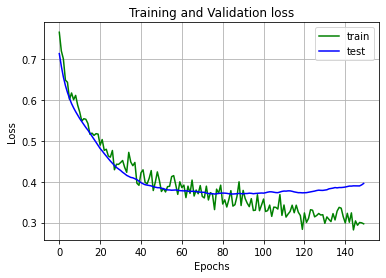

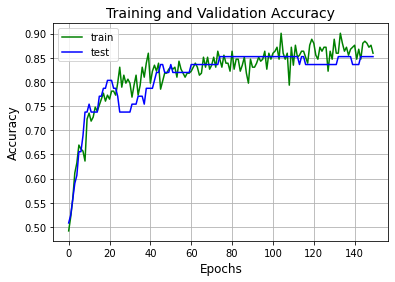

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.8531 - accuracy: 0.4711 - val_loss: 0.8173 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.8214 - accuracy: 0.4628 - val_loss: 0.7880 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7940 - accuracy: 0.4669 - val_loss: 0.7629 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7855 - accuracy: 0.4917 - val_loss: 0.7413 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7256 - accuracy: 0.5455 - val_loss: 0.7235 - val_accuracy: 0.4426
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7261 - accuracy: 0.5165 - val_loss: 0.7088 - val_accuracy: 0.4426
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7131 - accuracy: 0.5248 - val_loss: 0.6959 - val_accuracy: 0.4590
Epoch 8

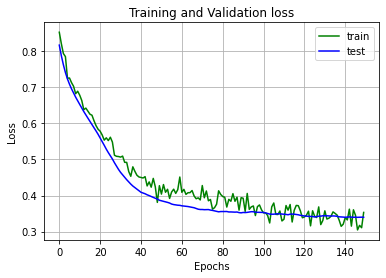

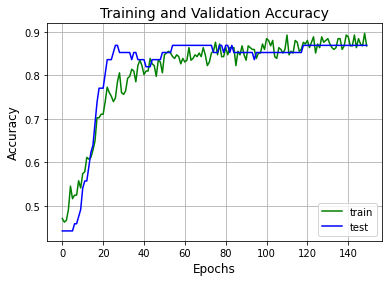

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 30ms/step - loss: 0.6407 - accuracy: 0.6446 - val_loss: 0.5794 - val_accuracy: 0.7541
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.6116 - val_loss: 0.5706 - val_accuracy: 0.7541
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6820 - accuracy: 0.6198 - val_loss: 0.5633 - val_accuracy: 0.7541
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6446 - val_loss: 0.5560 - val_accuracy: 0.7705
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6071 - accuracy: 0.6777 - val_loss: 0.5479 - val_accuracy: 0.7705
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5983 - accuracy: 0.6736 - val_loss: 0.5409 - val_accuracy: 0.7869
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5950 - accuracy: 0.6446 - val_loss: 0.5346 - val_accuracy: 0.8033
Epoch 8/150
8/8 [====================

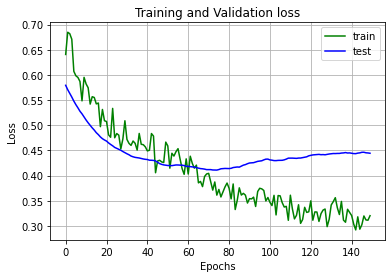

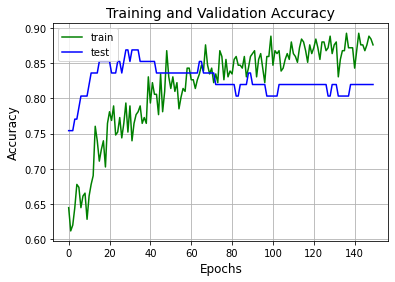

accuracy: 81.967%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.6656 - accuracy: 0.5950 - val_loss: 0.6569 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6243 - accuracy: 0.6074 - val_loss: 0.6356 - val_accuracy: 0.6885
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6115 - accuracy: 0.6777 - val_loss: 0.6178 - val_accuracy: 0.6885
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6031 - accuracy: 0.6901 - val_loss: 0.6015 - val_accuracy: 0.7213
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.5862 - accuracy: 0.7066 - val_loss: 0.5874 - val_accuracy: 0.7541
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5717 - accuracy: 0.7355 - val_loss: 0.5733 - val_accuracy: 0.7541
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5678 - accuracy: 0.7397 - val_loss: 0.5610 - val_accuracy: 0.7541
Epoch

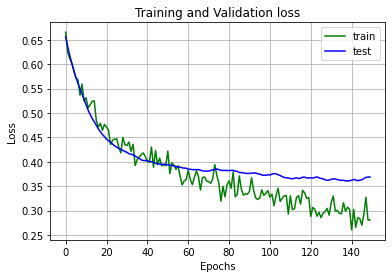

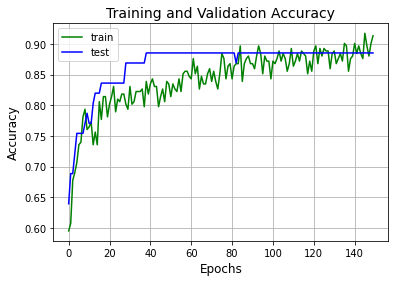

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.8924 - accuracy: 0.4587 - val_loss: 0.7860 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8388 - accuracy: 0.4835 - val_loss: 0.7391 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7853 - accuracy: 0.4917 - val_loss: 0.7005 - val_accuracy: 0.4918
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7322 - accuracy: 0.4835 - val_loss: 0.6653 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7114 - accuracy: 0.5661 - val_loss: 0.6364 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.5661 - val_loss: 0.6131 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6757 - accuracy: 0.5579 - val_loss: 0.5934 - val_accuracy: 0.6885
Epoch 

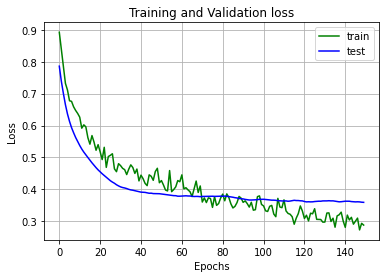

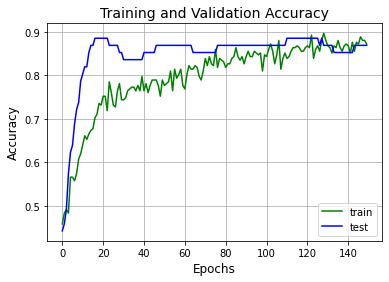

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 29ms/step - loss: 1.0294 - accuracy: 0.5124 - val_loss: 0.9686 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.9118 - accuracy: 0.4959 - val_loss: 0.9124 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8725 - accuracy: 0.5248 - val_loss: 0.8631 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.9022 - accuracy: 0.5000 - val_loss: 0.8195 - val_accuracy: 0.4918
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8024 - accuracy: 0.5413 - val_loss: 0.7857 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7509 - accuracy: 0.5165 - val_loss: 0.7560 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7481 - accuracy: 0.5331 - val_loss: 0.7318 - val_accuracy: 0.4754
Epoch 8/150
8/8 [=====================

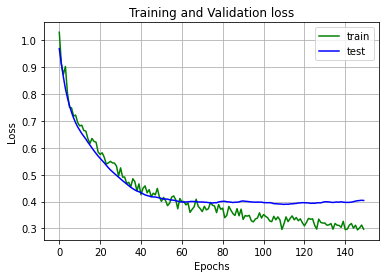

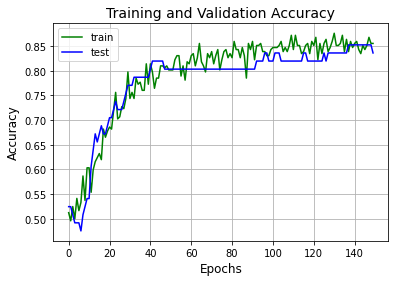

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.7300 - accuracy: 0.4835 - val_loss: 0.6915 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6971 - accuracy: 0.5124 - val_loss: 0.6744 - val_accuracy: 0.4262
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.5413 - val_loss: 0.6575 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6679 - accuracy: 0.5579 - val_loss: 0.6417 - val_accuracy: 0.4262
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6463 - accuracy: 0.5537 - val_loss: 0.6260 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6413 - accuracy: 0.5950 - val_loss: 0.6121 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6040 - accuracy: 0.6529 - val_loss: 0.5983 - val_accuracy: 0.6066
Epoch 8/

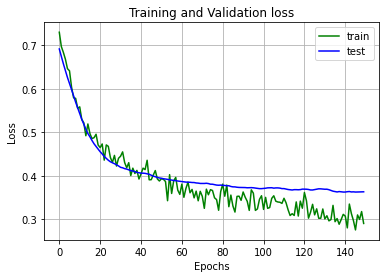

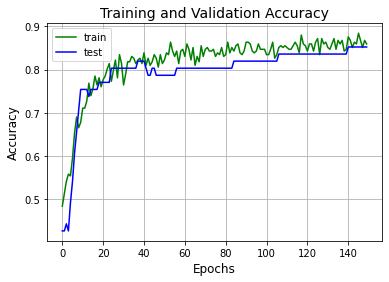

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.7260 - accuracy: 0.5537 - val_loss: 0.5971 - val_accuracy: 0.7213
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6759 - accuracy: 0.6240 - val_loss: 0.5814 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.5909 - val_loss: 0.5676 - val_accuracy: 0.7377
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6288 - accuracy: 0.6322 - val_loss: 0.5554 - val_accuracy: 0.7213
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6532 - accuracy: 0.6074 - val_loss: 0.5439 - val_accuracy: 0.7213
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.5907 - accuracy: 0.7107 - val_loss: 0.5334 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6089 - accuracy: 0.7025 - val_loss: 0.5231 - val_accuracy: 0.7541
Epoch 8

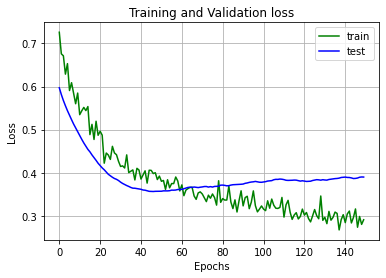

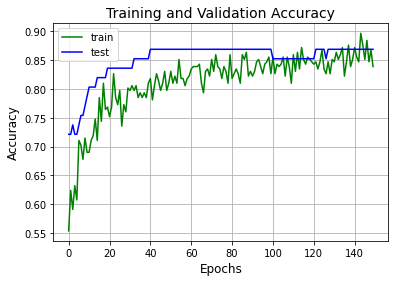

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 29ms/step - loss: 0.9549 - accuracy: 0.4587 - val_loss: 0.8308 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.8854 - accuracy: 0.5165 - val_loss: 0.7905 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8994 - accuracy: 0.4917 - val_loss: 0.7547 - val_accuracy: 0.4918
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8334 - accuracy: 0.4876 - val_loss: 0.7256 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7581 - accuracy: 0.5455 - val_loss: 0.7033 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7607 - accuracy: 0.4876 - val_loss: 0.6829 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7431 - accuracy: 0.6074 - val_loss: 0.6657 - val_accuracy: 0.5902
Epoch 8/150
8/8 [====================

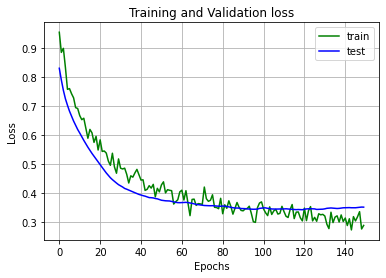

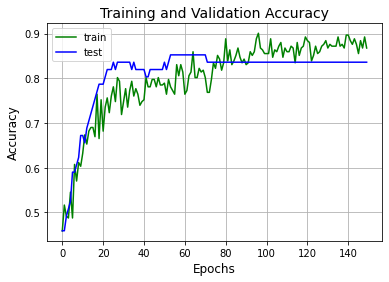

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.7099 - accuracy: 0.5124 - val_loss: 0.7100 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7394 - accuracy: 0.4587 - val_loss: 0.6967 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6819 - accuracy: 0.5248 - val_loss: 0.6848 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.5537 - val_loss: 0.6744 - val_accuracy: 0.5246
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6752 - accuracy: 0.5455 - val_loss: 0.6652 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6663 - accuracy: 0.6033 - val_loss: 0.6570 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6451 - accuracy: 0.5992 - val_loss: 0.6498 - val_accuracy: 0.6885
Epoch 8/

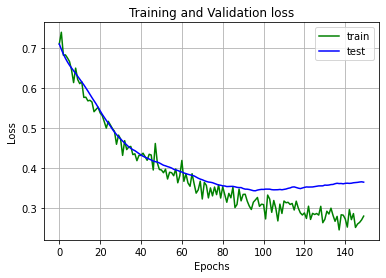

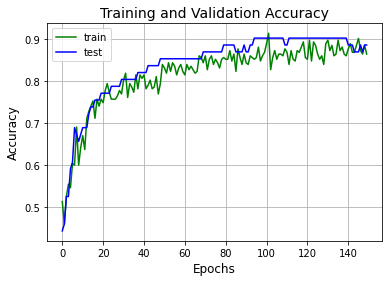

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.9527 - accuracy: 0.5083 - val_loss: 0.8200 - val_accuracy: 0.5574
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.8765 - accuracy: 0.4628 - val_loss: 0.7774 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7991 - accuracy: 0.5000 - val_loss: 0.7410 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7867 - accuracy: 0.5413 - val_loss: 0.7093 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7528 - accuracy: 0.5661 - val_loss: 0.6825 - val_accuracy: 0.6393
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7168 - accuracy: 0.5702 - val_loss: 0.6588 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7060 - accuracy: 0.5537 - val_loss: 0.6382 - val_accuracy: 0.6557
Epoch 

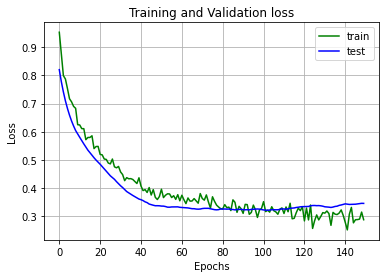

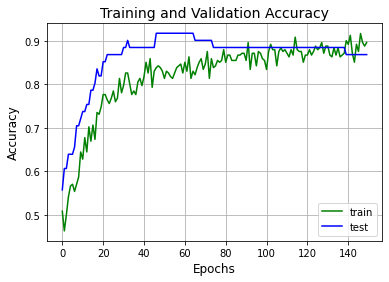

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 30ms/step - loss: 0.7267 - accuracy: 0.4628 - val_loss: 0.6478 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.5496 - val_loss: 0.6360 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6823 - accuracy: 0.5785 - val_loss: 0.6261 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6713 - accuracy: 0.6281 - val_loss: 0.6160 - val_accuracy: 0.6721
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6634 - accuracy: 0.5826 - val_loss: 0.6068 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.6240 - val_loss: 0.5983 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6125 - accuracy: 0.6364 - val_loss: 0.5898 - val_accuracy: 0.6885
Epoch 8/150
8/8 [===================

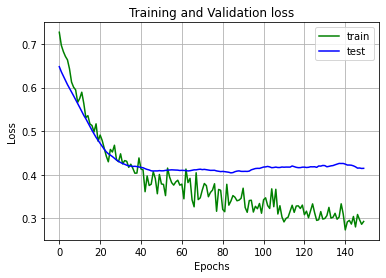

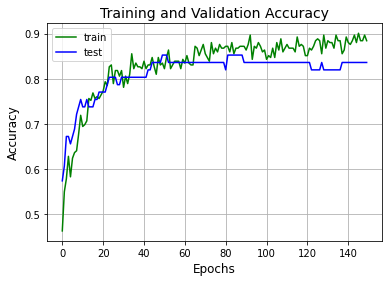

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.9374 - accuracy: 0.4545 - val_loss: 0.8896 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.9002 - accuracy: 0.4504 - val_loss: 0.8433 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8326 - accuracy: 0.4793 - val_loss: 0.8055 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7678 - accuracy: 0.5165 - val_loss: 0.7738 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7550 - accuracy: 0.4587 - val_loss: 0.7455 - val_accuracy: 0.4754
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7073 - accuracy: 0.5331 - val_loss: 0.7206 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7017 - accuracy: 0.4835 - val_loss: 0.6984 - val_accuracy: 0.4918
Epo

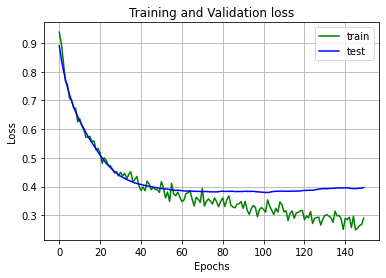

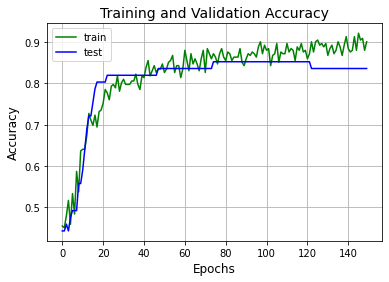

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.7932 - accuracy: 0.4628 - val_loss: 0.6871 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7544 - accuracy: 0.5207 - val_loss: 0.6717 - val_accuracy: 0.6721
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7358 - accuracy: 0.4711 - val_loss: 0.6616 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7229 - accuracy: 0.5041 - val_loss: 0.6526 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6980 - accuracy: 0.5620 - val_loss: 0.6450 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6702 - accuracy: 0.5950 - val_loss: 0.6374 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6879 - accuracy: 0.6033 - val_loss: 0.6306 - val_accuracy: 0.7377
Epo

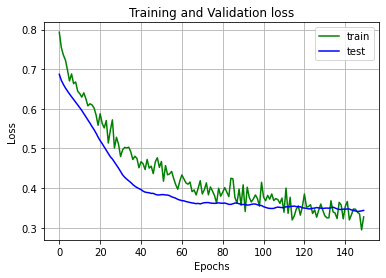

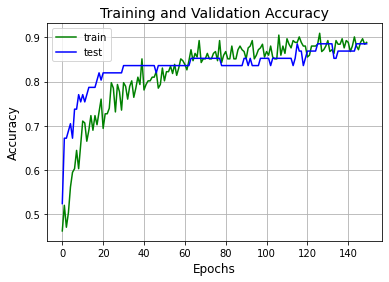

accuracy: 88.525%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 31ms/step - loss: 0.7658 - accuracy: 0.4091 - val_loss: 0.7468 - val_accuracy: 0.4098
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7616 - accuracy: 0.4132 - val_loss: 0.7290 - val_accuracy: 0.4098
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7640 - accuracy: 0.4132 - val_loss: 0.7119 - val_accuracy: 0.4098
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7173 - accuracy: 0.5289 - val_loss: 0.6960 - val_accuracy: 0.4918
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7049 - accuracy: 0.5331 - val_loss: 0.6832 - val_accuracy: 0.5082
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7041 - accuracy: 0.5496 - val_loss: 0.6716 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.5331 - val_loss: 0.6613 - val_accuracy: 0.5574
Epoch 8/150
8/8 [====================

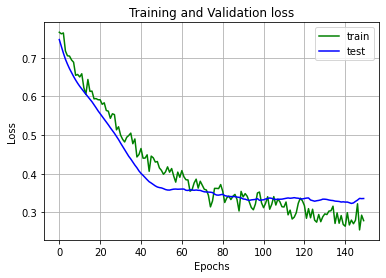

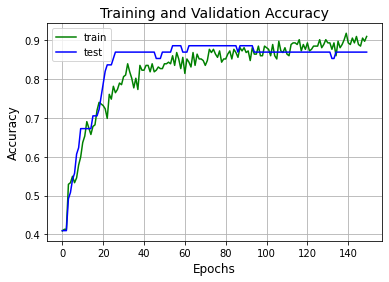

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.6663 - accuracy: 0.5785 - val_loss: 0.6544 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6580 - accuracy: 0.5826 - val_loss: 0.6438 - val_accuracy: 0.6721
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6429 - accuracy: 0.6033 - val_loss: 0.6333 - val_accuracy: 0.7049
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6305 - accuracy: 0.6033 - val_loss: 0.6227 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5950 - accuracy: 0.7107 - val_loss: 0.6121 - val_accuracy: 0.7541
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6044 - accuracy: 0.6901 - val_loss: 0.5996 - val_accuracy: 0.8033
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.6694 - val_loss: 0.5860 - val_accuracy: 0.8033
Epoch 

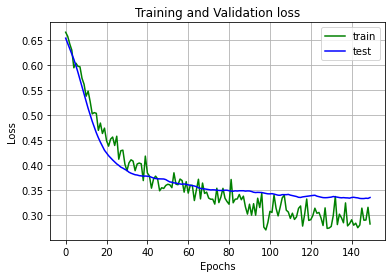

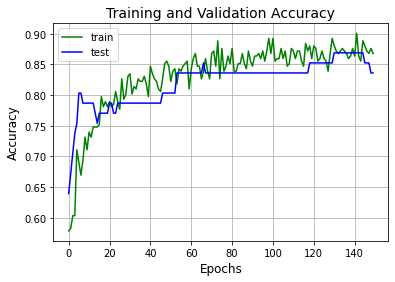

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 30ms/step - loss: 0.8145 - accuracy: 0.4215 - val_loss: 0.7741 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7680 - accuracy: 0.4545 - val_loss: 0.7535 - val_accuracy: 0.4754
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7509 - accuracy: 0.4835 - val_loss: 0.7353 - val_accuracy: 0.4918
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7377 - accuracy: 0.4380 - val_loss: 0.7204 - val_accuracy: 0.4918
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7182 - accuracy: 0.5041 - val_loss: 0.7078 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7163 - accuracy: 0.5083 - val_loss: 0.6970 - val_accuracy: 0.4754
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6969 - accuracy: 0.5455 - val_loss: 0.6876 - val_accuracy: 0.4754
Epoch 8

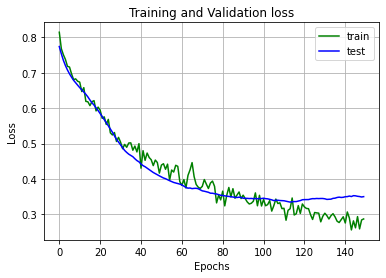

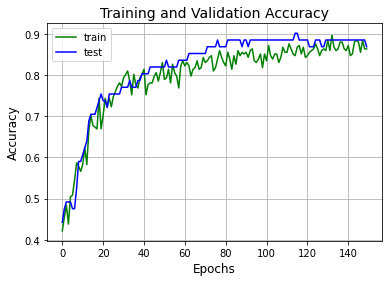

accuracy: 86.885%
Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


8/8 [==============================] - 1s 31ms/step - loss: 0.8305 - accuracy: 0.4917 - val_loss: 0.7869 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8139 - accuracy: 0.4545 - val_loss: 0.7626 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7537 - accuracy: 0.4917 - val_loss: 0.7448 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7243 - accuracy: 0.5207 - val_loss: 0.7316 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7403 - accuracy: 0.5083 - val_loss: 0.7197 - val_accuracy: 0.4426
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7464 - accuracy: 0.4959 - val_loss: 0.7088 - val_accuracy: 0.4754
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7021 - accuracy: 0.5372 - val_loss: 0.6996 - val_accuracy: 0.5082
Epoch 8/150
8/8 [=================

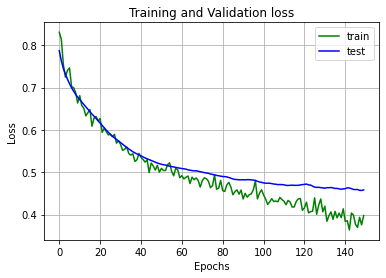

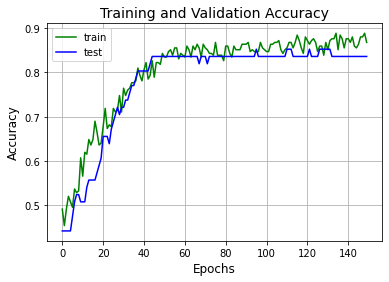

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 28ms/step - loss: 0.7626 - accuracy: 0.5372 - val_loss: 0.7437 - val_accuracy: 0.5902
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7647 - accuracy: 0.5455 - val_loss: 0.7128 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7244 - accuracy: 0.5826 - val_loss: 0.6864 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7337 - accuracy: 0.5331 - val_loss: 0.6661 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.5992 - val_loss: 0.6480 - val_accuracy: 0.6393
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6740 - accuracy: 0.5579 - val_loss: 0.6321 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6262 - accuracy: 0.5868 - val_loss: 0.6184 - val_accuracy: 0.6721
Epoch 8

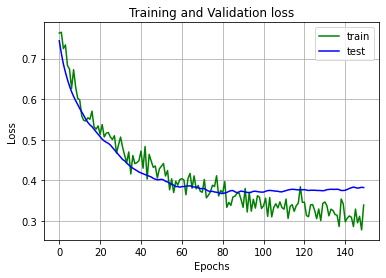

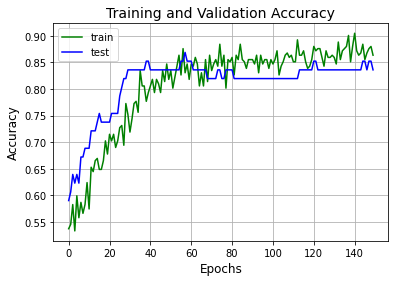

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 45ms/step - loss: 0.7199 - accuracy: 0.5496 - val_loss: 0.7021 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5331 - val_loss: 0.6921 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.5702 - val_loss: 0.6823 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6998 - accuracy: 0.4876 - val_loss: 0.6731 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.6198 - val_loss: 0.6641 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6682 - accuracy: 0.6033 - val_loss: 0.6550 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6407 - accuracy: 0.6240 - val_loss: 0.6467 - val_accuracy: 0.6393
Epoch 8/

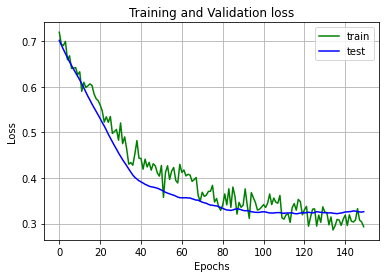

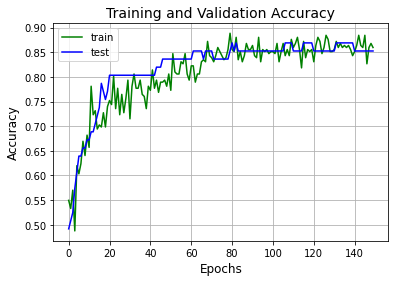

accuracy: 85.246%
Best Score: 83.512%
Best Parameters: {'neurons': (14, 6), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}


In [24]:
# Apply Random Search for parameter tuning

# Initialize Keras Classifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Initialize parameters
# Min 2 splits, max 6 splits
# param_dict = {'batch_size': [16, 32],
#                'epochs': [100, 150],
#                'folds': [3, 4, 5],
#               'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)],
#               'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

param_dict = {'batch_size': [32],
              'epochs': [150],
              'folds': [3],
              'neurons': [(14, 6), (14, 8)],
              'dropout_rate': [0.4]}

# Initialize scoring method
scoring_dict = {'accuracy_score': make_scorer(accuracy_score),
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score)}

# Initialize RandomizedSearchCV object
rand = RandomizedSearchCV(estimator=model,
                          param_distributions=param_dict,
                          scoring=scoring_dict,
                          refit='accuracy_score')
rand_result = rand.fit(X_train, y_train)

# Show the results
print("Best Score: %.3f%%" % (rand_result.best_score_ * 100))
print("Best Parameters: %s" % rand_result.best_params_)


#### -- Sample Random Search Results --

##### param_dict = {'batch_size': [16], 'epochs': [100], 'folds': [3, 4], 'neurons': [6, 8]}

**Best Score:** 77.7541%, **Best Parameters:** {'neurons': 8, 'folds': 3, 'epochs': 100, 'batch_size': 16}

**Search time:** Approx. 15 minutes

##### param_dict = {'batch_size': [16, 32], 'epochs': [150], 'folds': [3, 4], 'neurons': [10, 12]}

**Best Score:** 80.820%, **Best Parameters:** {'neurons': 12, 'folds': 4, 'epochs': 150, 'batch_size': 32}

**Search time:** Approx. 1.25 hours

##### param_dict = {'batch_size': [16, 32], 'epochs': [100, 150], 'folds': [3, 4, 5], 'neurons': [4, 6, 8, 10, 12]}

**Best Score:** 85.4372%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'batch_size': 16}

**Search time:** At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4, 5], 'neurons': [12], 'dropout_rate': [0.05, 0.1, 0.15]}

**Best Score:** 85.578%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

**Search time:** At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3], 'neurons': [12], 'dropout_rate': [0.04, 0.05, 0.06]}

**Best Score:** 86.378%, **Best Parameters:** {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

**Search time:** Approx. 15 minutes

##### **With one Dropout layer:**

**param_dict** = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4],  'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)], 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

1. **Best Score:** 86.412%, **Best Parameters:** {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

2. **Best Score:** 87.645%, **Best Parameters:** {'neurons': (14, 6), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

**Search time:** Approx. 1.25 hours

##### **With two Dropout layers:**

**param_dict** = param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4], 'neurons': [(14, 6), (14, 8)], 'dropout_rate': [0.3, 0.4, 0.5]}

- **Best Score:** 85.978%, **Best Parameters:** {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.5, 'batch_size': 32}

**Search time:** Approx. 1.5 hours